# random ssample imputation

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [4]:
df.head(7)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [35]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [36]:
def impute_nan(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    #It will have the random sample to fill na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    #pandas need to have same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [38]:
impute_nan(df, 'Age', df['Age'].median())

In [39]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [40]:
import matplotlib.pyplot as plt

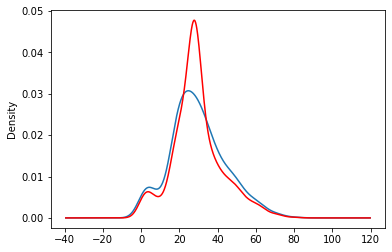

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_median'].plot(kind='kde', color='red', ax=ax)



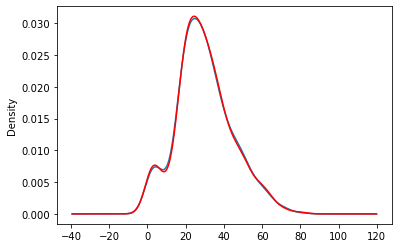

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', color='red', ax=ax)